Epoch 1/20
1876/1876 [==============================] - 5s 2ms/step - loss: 0.0069
Epoch 2/20
1876/1876 [==============================] - 4s 2ms/step - loss: 0.0013
Epoch 3/20
1876/1876 [==============================] - 4s 2ms/step - loss: 0.0010
Epoch 4/20
1876/1876 [==============================] - 4s 2ms/step - loss: 9.0983e-04
Epoch 5/20
1876/1876 [==============================] - 5s 2ms/step - loss: 8.4337e-04
Epoch 6/20
1876/1876 [==============================] - 4s 2ms/step - loss: 8.0617e-04
Epoch 7/20
1876/1876 [==============================] - 4s 2ms/step - loss: 7.8692e-04
Epoch 8/20
1876/1876 [==============================] - 5s 2ms/step - loss: 7.7353e-04
Epoch 9/20
1876/1876 [==============================] - 4s 2ms/step - loss: 7.6289e-04
Epoch 10/20
1876/1876 [==============================] - 3s 2ms/step - loss: 7.5390e-04
Epoch 11/20
1876/1876 [==============================] - 5s 2ms/step - loss: 7.5024e-04
Epoch 12/20
1876/1876 [==============================

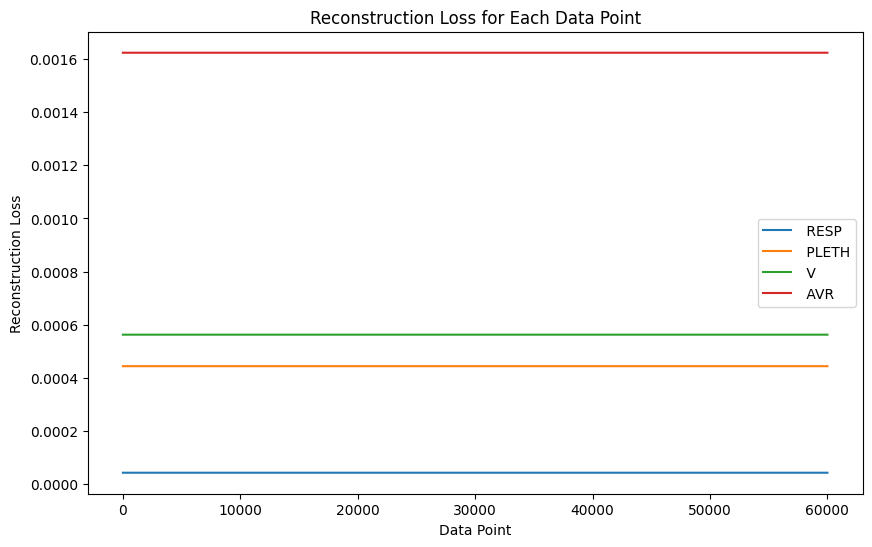

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset1 = pd.read_excel("dataset1.xlsx")

# Preprocessing
scaler = MinMaxScaler()
dataset1_scaled = scaler.fit_transform(dataset1.drop(columns=['Time [s]']))

# Define Variational Autoencoder (VAE) model
latent_dim = 2  # Set the dimension of latent space

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Define encoder
encoder_inputs = layers.Input(shape=(dataset1_scaled.shape[1],))
x = layers.Dense(64, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(latent_inputs)
outputs = layers.Dense(dataset1_scaled.shape[1], activation='sigmoid')(x)
decoder = models.Model(latent_inputs, outputs, name="decoder")

# Compile VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='mse')

# Train VAE model
vae.fit(dataset1_scaled, dataset1_scaled, epochs=20, batch_size=32)

# Predict reconstructed data using VAE model
reconstructed_data = vae.predict(dataset1_scaled)

# Calculate reconstruction loss for each column and each point
reconstruction_loss_dict = {}

for i, column_name in enumerate(dataset1.columns[1:]):  # Exclude the first column which is 'Time [s]'
    column_data = dataset1_scaled[:, i]
    reconstructed_column_data = reconstructed_data[:, i]
    mse_column = np.mean(np.power(column_data - reconstructed_column_data, 2))
    reconstruction_loss_dict[column_name] = [mse_column] * len(column_data)  # Repeat mse_column for each data point

# Plot reconstruction loss for each column and each point
plt.figure(figsize=(10, 6))

for column_name, mse_column in reconstruction_loss_dict.items():
    plt.plot(range(len(mse_column)), mse_column, label=column_name)

plt.xlabel("Data Point")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Each Data Point")
plt.legend()
plt.show()


Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6095 - val_loss: 0.6037
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6038 - val_loss: 0.6030
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6034 - val_loss: 0.6030
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6032 - val_loss: 0.6026
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6031 - val_loss: 0.6029
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6030 - val_loss: 0.6025
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6030 - val_loss: 0.6024
Epoch 8/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6029 - val_loss: 0.6023
Epoch 9/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6028 - val_loss: 0.6024
Epoch 10/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.602

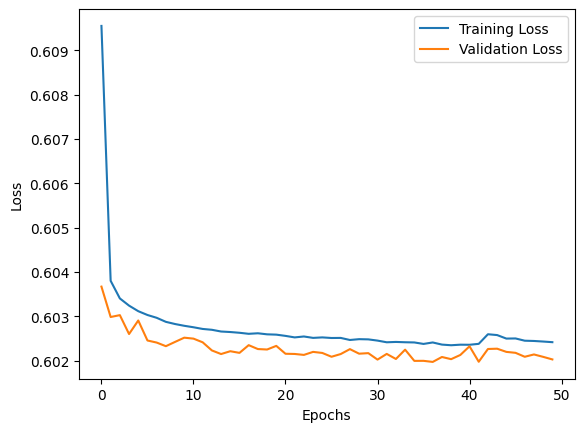

1876/1876 [==============================] - 4s 2ms/step


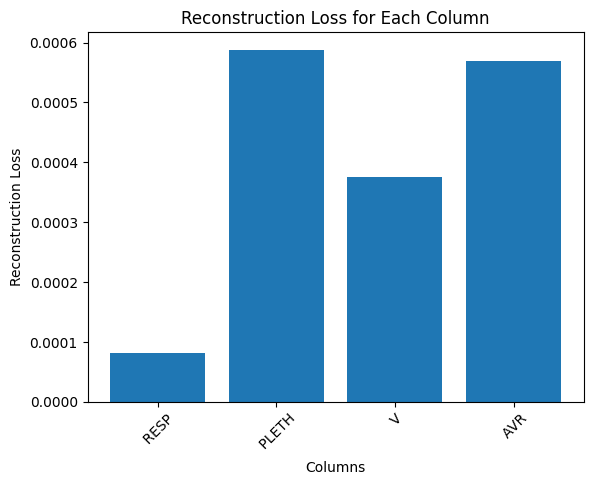

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset1 = pd.read_excel("dataset1.xlsx")

# Preprocessing
scaler = MinMaxScaler()
dataset1_scaled = scaler.fit_transform(dataset1.drop(columns=['Time [s]']))

# Define Variational Autoencoder (VAE) model
latent_dim = 2  # Set the dimension of latent space

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Define encoder
encoder_inputs = layers.Input(shape=(dataset1_scaled.shape[1],))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(latent_inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(dataset1_scaled.shape[1], activation='sigmoid')(x)
decoder = models.Model(latent_inputs, outputs, name="decoder")

# Compile VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='binary_crossentropy')

# Train VAE model
history = vae.fit(dataset1_scaled, dataset1_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict reconstructed data using VAE model
reconstructed_data = vae.predict(dataset1_scaled)

# Calculate reconstruction loss for each column and each point
reconstruction_loss_dict = {}

for i, column_name in enumerate(dataset1.columns[1:]):  # Exclude the first column which is 'Time [s]'
    column_data = dataset1_scaled[:, i]
    reconstructed_column_data = reconstructed_data[:, i]
    mse_column = np.mean(np.power(column_data - reconstructed_column_data, 2))
    reconstruction_loss_dict[column_name] = mse_column

# Plot reconstruction loss for each column
plt.bar(reconstruction_loss_dict.keys(), reconstruction_loss_dict.values())
plt.xlabel('Columns')
plt.ylabel('Reconstruction Loss')
plt.title('Reconstruction Loss for Each Column')
plt.xticks(rotation=45)
plt.show()



Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6112 - val_loss: 0.6036
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6038 - val_loss: 0.6035
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6035 - val_loss: 0.6032
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6034 - val_loss: 0.6030
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6033 - val_loss: 0.6027
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6032 - val_loss: 0.6030
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6032 - val_loss: 0.6030
Epoch 8/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6030 - val_loss: 0.6025
Epoch 9/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6029 - val_loss: 0.6024
Epoch 10/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.602

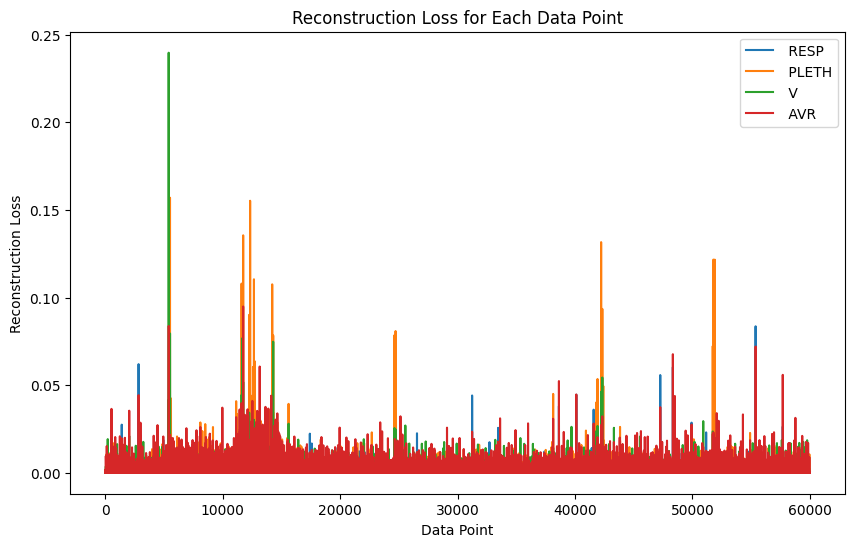

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset1 = pd.read_excel("dataset1.xlsx")

# Preprocessing
scaler = MinMaxScaler()
dataset1_scaled = scaler.fit_transform(dataset1.drop(columns=['Time [s]']))

# Define Variational Autoencoder (VAE) model
latent_dim = 2  # Set the dimension of latent space

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Define encoder
encoder_inputs = layers.Input(shape=(dataset1_scaled.shape[1],))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(latent_inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(dataset1_scaled.shape[1], activation='sigmoid')(x)
decoder = models.Model(latent_inputs, outputs, name="decoder")

# Compile VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='binary_crossentropy')

# Train VAE model
history = vae.fit(dataset1_scaled, dataset1_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Predict reconstructed data using VAE model
reconstructed_data = vae.predict(dataset1_scaled)

# Calculate reconstruction loss for each column and each point
reconstruction_loss_dict = {}

for i, column_name in enumerate(dataset1.columns[1:]):  # Exclude the first column which is 'Time [s]'
    column_data = dataset1_scaled[:, i]
    reconstructed_column_data = reconstructed_data[:, i]
    mse_column = np.mean(np.power(column_data - reconstructed_column_data, 2))
    reconstruction_loss_dict[column_name] = mse_column

# Plot reconstruction loss for each column and each point
plt.figure(figsize=(10, 6))

for column_name in reconstruction_loss_dict.keys():
    column_index = dataset1.columns.get_loc(column_name) - 1
    column_loss = np.power(dataset1_scaled[:, column_index] - reconstructed_data[:, column_index], 2)
    plt.plot(range(len(column_loss)), column_loss, label=column_name)

plt.xlabel("Data Point")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Each Data Point")
plt.legend()
plt.show()


Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6108 - val_loss: 0.6036
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6039 - val_loss: 0.6040
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6036 - val_loss: 0.6030
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6034 - val_loss: 0.6028
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6032 - val_loss: 0.6026
Epoch 6/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6030 - val_loss: 0.6026
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6029 - val_loss: 0.6026
Epoch 8/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6029 - val_loss: 0.6023
Epoch 9/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6028 - val_loss: 0.6024
Epoch 10/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.602

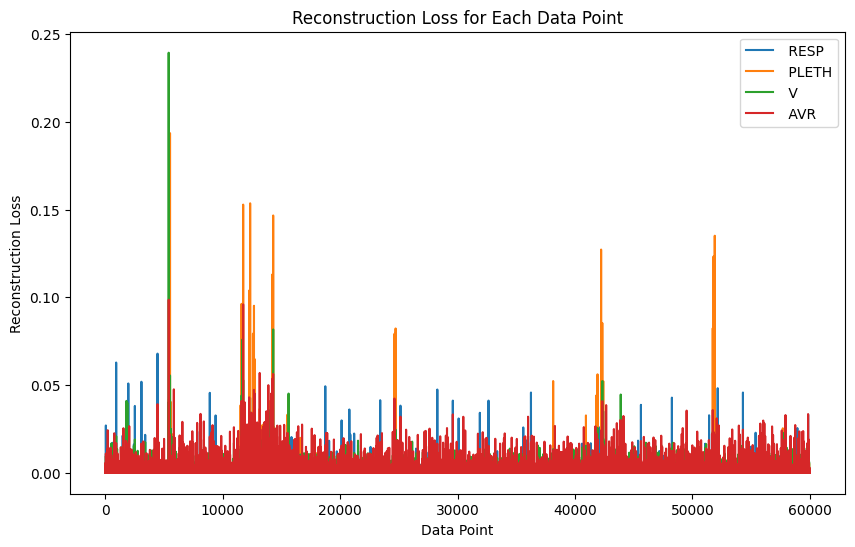

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset1 = pd.read_excel("dataset1.xlsx")

# Preprocessing
scaler = MinMaxScaler()
dataset1_scaled = scaler.fit_transform(dataset1.drop(columns=['Time [s]']))

# Define Variational Autoencoder (VAE) model
latent_dim = 2  # Set the dimension of latent space

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Define encoder
encoder_inputs = layers.Input(shape=(dataset1_scaled.shape[1],))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(latent_inputs)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(dataset1_scaled.shape[1], activation='sigmoid')(x)
decoder = models.Model(latent_inputs, outputs, name="decoder")

# Compile VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='binary_crossentropy')

# Train VAE model
history = vae.fit(dataset1_scaled, dataset1_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Predict reconstructed data using VAE model
reconstructed_data = vae.predict(dataset1_scaled)

# Calculate reconstruction loss for each column and each point
reconstruction_loss_dict = {}

for i, column_name in enumerate(dataset1.columns[1:]):  # Exclude the first column which is 'Time [s]'
    column_data = dataset1_scaled[:, i]
    reconstructed_column_data = reconstructed_data[:, i]
    bce_column = tf.keras.losses.binary_crossentropy(column_data, reconstructed_column_data)
    mean_bce_column = tf.reduce_mean(bce_column).numpy()  # Convert tensor to numpy array
    reconstruction_loss_dict[column_name] = mean_bce_column

# Plot reconstruction loss for each column and each point
plt.figure(figsize=(10, 6))

for column_name in reconstruction_loss_dict.keys():
    column_index = dataset1.columns.get_loc(column_name) - 1
    column_loss = np.power(dataset1_scaled[:, column_index] - reconstructed_data[:, column_index], 2)
    plt.plot(range(len(column_loss)), column_loss, label=column_name)

plt.xlabel("Data Point")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Each Data Point")
plt.legend()
plt.show()


Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.6114 - val_loss: 0.6036
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6039 - val_loss: 0.6031
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6037 - val_loss: 0.6032
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6035 - val_loss: 0.6030
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6034 - val_loss: 0.6029
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6033 - val_loss: 0.6028
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6032 - val_loss: 0.6027
Epoch 8/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6031 - val_loss: 0.6029
Epoch 9/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6029 - val_loss: 0.6025
Epoch 10/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.602

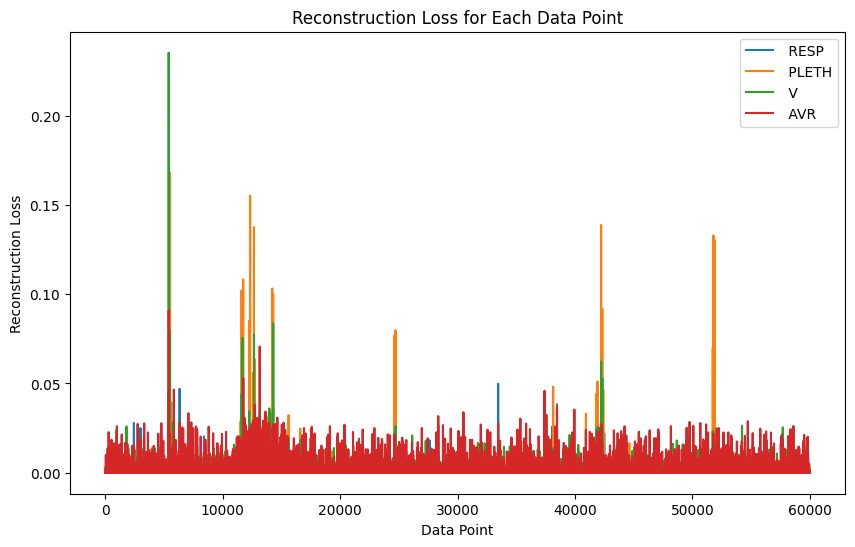

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
dataset1 = pd.read_excel("dataset1.xlsx")

# Preprocessing
scaler = MinMaxScaler()
dataset1_scaled = scaler.fit_transform(dataset1.drop(columns=['Time [s]']))

# Define Variational Autoencoder (VAE) model
latent_dim = 2  # Set the dimension of latent space

class VAE(models.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

# Define encoder
encoder_inputs = layers.Input(shape=(dataset1_scaled.shape[1],))
x = layers.Dense(128, activation='relu')(encoder_inputs)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)  # Add an extra hidden layer
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)


# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,), name="z")([z_mean, z_log_var])
encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Define decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(32, activation='relu')(latent_inputs)  # Add an extra hidden layer
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(dataset1_scaled.shape[1], activation='sigmoid')(x)
decoder = models.Model(latent_inputs, outputs, name="decoder")

# Compile VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss='binary_crossentropy')

# Train VAE model
history = vae.fit(dataset1_scaled, dataset1_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Predict reconstructed data using VAE model
reconstructed_data = vae.predict(dataset1_scaled)

# Calculate reconstruction loss for each column and each point
reconstruction_loss_dict = {}

for i, column_name in enumerate(dataset1.columns[1:]):  # Exclude the first column which is 'Time [s]'
    column_data = dataset1_scaled[:, i]
    reconstructed_column_data = reconstructed_data[:, i]
    bce_column = tf.keras.losses.binary_crossentropy(column_data, reconstructed_column_data)
    mean_bce_column = tf.reduce_mean(bce_column).numpy()  # Convert tensor to numpy array
    reconstruction_loss_dict[column_name] = mean_bce_column

# Plot reconstruction loss for each column and each point
plt.figure(figsize=(10, 6))

for column_name in reconstruction_loss_dict.keys():
    column_index = dataset1.columns.get_loc(column_name) - 1
    column_loss = np.power(dataset1_scaled[:, column_index] - reconstructed_data[:, column_index], 2)
    plt.plot(range(len(column_loss)), column_loss, label=column_name)

plt.xlabel("Data Point")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Each Data Point")
plt.legend()
plt.show()


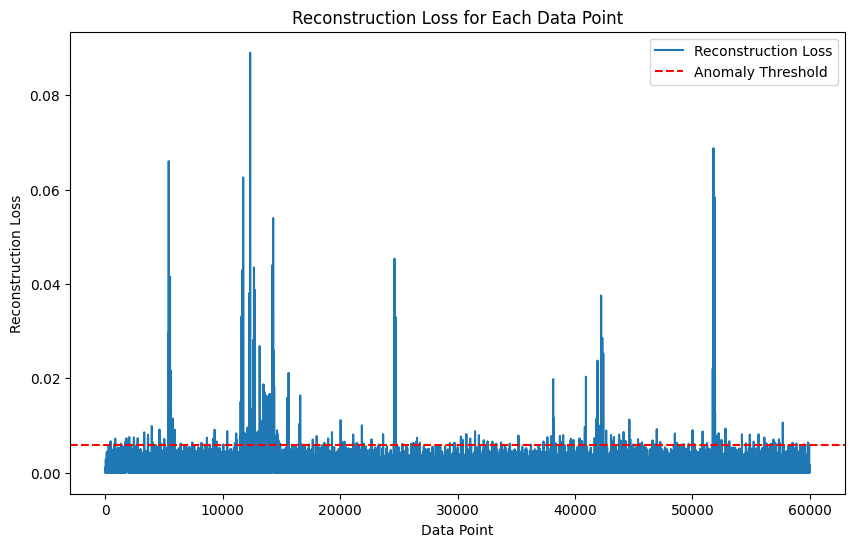

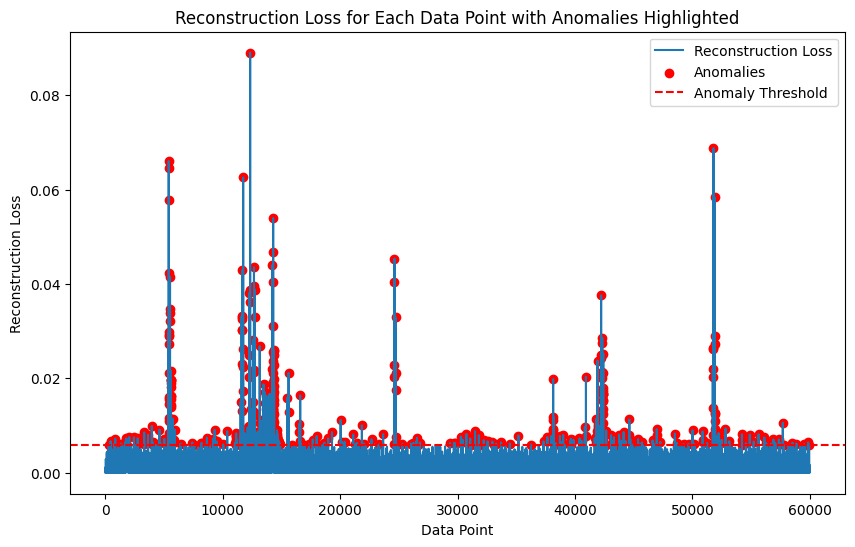

In [ ]:
# Calculate reconstruction loss for each data point
reconstruction_losses = np.mean(np.power(dataset1_scaled - reconstructed_data, 2), axis=1)

# Set threshold for anomaly detection
threshold = np.percentile(reconstruction_losses, 99)  # Example: 99th percentile

# Identify anomalies
anomalies = dataset1[reconstruction_losses > threshold]

# Plot reconstruction loss for each data point
plt.figure(figsize=(10, 6))
plt.plot(range(len(reconstruction_losses)), reconstruction_losses, label="Reconstruction Loss")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.xlabel("Data Point")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Each Data Point")
plt.legend()
plt.show()

# Highlight anomalies in the plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(reconstruction_losses)), reconstruction_losses, label="Reconstruction Loss")
plt.scatter(anomalies.index, reconstruction_losses[anomalies.index], color='r', label="Anomalies")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.xlabel("Data Point")
plt.ylabel("Reconstruction Loss")
plt.title("Reconstruction Loss for Each Data Point with Anomalies Highlighted")
plt.legend()
plt.show()
